# STAT 207 Project 03 - INSERT TITLE HERE

YOUR NAMES

<hr>

### Contribution Report

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

my submission is under Jihan jihank2

If you said **my submission is under netID** above, we will not grade any of your project submission.

If you said **grade this submission** above, who worked with you on this project?  Write both their **names** and **netIDs**.  

You should list the contribution of each team member to the report.

*For example:*

*John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*

OR

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Group Work Reflection

Reflecting on your experience working as a group, how do you think the project went?  What were the most effective things your group did to work together?  What were the least effective things your group did to work together?  What have you learned about group work from the last project?  What might you change about your group's process or dynamics for the next project?  Did you face any substantial challenges in working together?  If so, please explain any challenges that you had.

*Note*: this can be completed individually or as a group, and each person can submit their own reflection to their own repository/submission or completely within the group submission.  If you would like your TA to read your individual reflection and yours is not the submission to be graded, be sure to email your TA.

## 1. Introduction

In [108]:
#Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [109]:
df = pd.read_csv('shark_tank_companies.csv')
df.sample(5)

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
154,False,A rock band.,14,Entertainment,Tom Callahan,"El Segundo, CA",http://mockrecords.com/cab-20,200000,20,1000000,3,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,CAB-20 Rock Band,3-14,False
443,True,"Drain Strain is a revolutionary, never-clog dr...",17,Storage and Cleaning Products,Naushad Ali,"Springfield, MO",http://www.drainstrain.com,110000,15,733333,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Drain Strain,6-17,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
403,False,"Singtrix is the ultimate karaoke system, featu...",7,Electronics,John Devecka and Eric Berkowitz,"New York, NY",http://www.singtrix.com/,1500000,5,30000000,6,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Singtrix,6-7,True
287,False,"An all-electric, jet-propelled body board.",7,Outdoor Recreation,NaN,"Los Angeles, CA",http://www.kymerabodyboard.com,250000,20,1250000,5,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,John Paul DeJoria,Kymera Body Board,5-7,False


## 2. Linear Regression Analytical Tasks

Research Question: What is the relationship between the percent of the company offered to a Shark, exchangeforstake, and the amount a company asks for on Shark Tank, askedfor, after controlling the valuation of the company, whether a deal was made, and whether multiple entrepreneurs were involved, both in the sample adn the underlying population? Additionally, how well does this model perform on new data?

<h3>Fitlering and cleaning data:</h3>

In [110]:
df_model = df[['askedfor','exchangeforstake','valuation','deal','multiple_entreprenuers']].dropna()

In [111]:
df_model['deal'] = df_model['deal'].astype(int)

In [112]:
df_model.sample(5)

,askedfor,exchangeforstake,valuation,deal,multiple_entreprenuers
227,250000,10,2500000,0,False
66,300000,5,6000000,0,False
78,25000,20,125000,0,False
414,100000,10,1000000,0,False
391,35000,25,140000,1,False


<h3>Test and Training sets:</h3>

In [113]:
X = df_model[['exchangeforstake','valuation','multiple_entreprenuers','deal']]
y = df_model['askedfor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=207)

We split the data 80/20 into train/test using random_state=207 so anyone can reproduce the same split and results.

In [114]:
df_train = X_train.copy()
df_train['askedfor'] = y_train
df_test = X_test.copy()
df_test['askedfor'] = y_test

df_train.head()

,exchangeforstake,valuation,multiple_entreprenuers,deal,askedfor
485,20,750000,False,0,150000
278,10,750000,False,0,75000
446,10,1500000,False,1,150000
418,15,666667,False,0,100000
377,15,500000,True,1,75000


<h3>Creating and fitting the Linear Regression model:</h3>

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[ 6.12863461e+03  8.41082176e-02 -1.38763243e+04 -6.05030833e+03]
-38518.99811727056


Equation for the linear model:

y_hat ​= −38518.998 + 6128.635⋅exchangeforstake + 0.0841⋅valuation − 13876.324⋅multiple_entreprenuers − 6050.308⋅deal

Interpretation of the slope for exchangeforstake:

Holding all other variables constant, for each additional 1% of the company value willing to exchange to a Shark, the amount a company asks for increases by $6,128.63 on average.

<h3>Confidence Intervals:</h3>

In [116]:
X_train.dtypes

exchangeforstake          int64
valuation                 int64
multiple_entreprenuers     bool
deal                      int64
dtype: object

In [117]:
X_train['multiple_entreprenuers'] = X_train['multiple_entreprenuers'].astype(int)
X_test['multiple_entreprenuers'] = X_test['multiple_entreprenuers'].astype(int)
X_train.dtypes

exchangeforstake          int64
valuation                 int64
multiple_entreprenuers    int64
deal                      int64
dtype: object

In [118]:
X_train_sm = sm.add_constant(X_train)
ci_model = sm.OLS(y_train, X_train_sm).fit()
ci_model.conf_int()

,0,1
const,-87333.466157,10295.469914
exchangeforstake,4325.952884,7931.316335
valuation,0.078596,0.089620
multiple_entreprenuers,-49615.315125,21862.666588
deal,-40347.104475,28246.487824


There is a 95% confidence interval for the slope of exchangeforstake that ranges from 4325.95 to 7931.32. This means we are 95% confident that each additional 1% of the company value offered to a Shark means that there is between $4,326 and $7,931 more money being requested from a Shark, holding the other variables constant.

Since the entire confidence interval is above zero, this supports our conclusion that there is a positive relationship in the population between exchangeforstake and askedfor.

<h3>Graphical and numerical summaries:</h3>

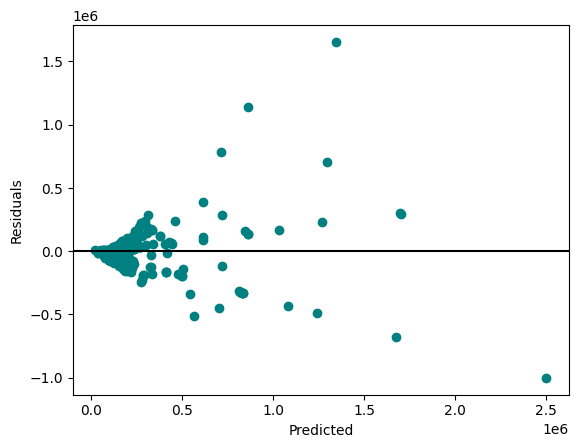

In [119]:
residuals = y_train - model.predict(X_train)

plt.scatter(model.predict(X_train), residuals, color = 'teal')
plt.axhline(0, color = 'black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

The residuals are centered around zero, which is good for our model's performance. However, the spread of the residuals increases for larger predicted values, meaning the model is fitting smaller “askedfor” amounts better than larger ones. This shows that it is not the best model if there are many large values, which can be a bad for us since our Shark Tank dataset has a variety of large values. 

Text(0.5, 1.0, 'QQ Plot of Residuals')

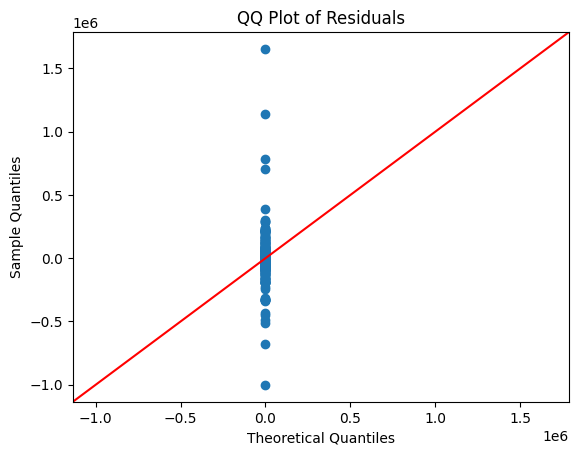

In [120]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")

In [121]:
print("Mean of residuals:", residuals.mean())
print("Standard deviation of residuals:", residuals.std())


Mean of residuals: 3.2925545567213886e-11
Standard deviation of residuals: 169237.24437693928


As for the numeric summaries, the mean residual is basically 0 and the standard deviation is about $169,237, showing the typical size of the prediction errors in the training data. These numbers are mostly reasonable, so we can overall infer that our model becomes less accurate for higher values.

<h3>Model performance:</h3>

In [122]:
r2 = model.score(X_train, y_train)
r2

0.7080460791477835

The r^2 value tells us that about 70.8% of the variability in the amount a company asks for is explained by this model using the explanatory variables that we selected.

This is a decently high number, meaning the model sees that there is a strong relationship in the training data. However, there is still around 29% variability that isn't explained by our model, which means that there must be other factors that influence how much a company asks for from the Sharks on Shark Tank.


In [123]:
preds = model.predict(X_test)
rmse = ((y_test - preds)**2).mean()**0.5
rmse

np.float64(547654.3906951335)

The test RMSE is $547,654.39, which means that on average, the model’s predictions have a variation from the true amount requested by about $548K. While this is a big number, since companies usually request very large amounts of money in Shark Tank, this RMSE is not unexpected.


 ## 3. Logistic Regression Analytical Tasks

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

## AI Acknowledgement

Did you use AI on this assignment?  

If so, answer the following questions:
- Which AI did you use?
- What prompts did you ask it?
- How did you integrate the responses into your assignment?